# **TIMISE toolbox example usage**


This example downloads some toy data part of MitoEM validation set and evaluate them using the toolbox. 

Take a look to 1) "TIMISE_example_files" folder (when downloading it in step 2) to see how different methods predictions and ground truth are place and 2) the paths used when calling evaluate() function.  

## **1. Download data and prepare enviroment**
---



First we need to download the code.

In [1]:
import os
%cd '/content/'
if not os.path.exists('/content/TIMISE'):
    !git clone https://github.com/danifranco/TIMISE.git

/content
Cloning into 'TIMISE'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 272 (delta 143), reused 199 (delta 72), pack-reused 0
Receiving objects: 100% (272/272), 12.17 MiB | 14.29 MiB/s, done.
Resolving deltas: 100% (143/143), done.


Install the dependencies

In [2]:
!pip install -r '/content/TIMISE/examples/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 11.8 MB/s 
     |████████████████████████████████| 9.0 MB 41.9 MB/s 
     |████████████████████████████████| 357 kB 45.5 MB/s 
     |████████████████████████████████| 427 kB 68.6 MB/s 
     |████████████████████████████████| 193 kB 58.6 MB/s 
     |████████████████████████████████| 96 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 224 kB 58.9 MB/s 
     |████████████████████████████████| 908 kB 46.1 MB/s 
     |████████████████████████████████| 2.1 MB 52.5 MB/s 
     |████████████████████████████████| 2.7 MB 52.4 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 4.1 MB 29.9 MB/s 
     |████████████████████████████████| 168 kB 36.3 MB/s 
     |████████████████████████████████| 1.8 MB 43.1 MB/s 
     |███████████████████████████████

## **2. Download example data**
---

In [3]:
example_files="TIMISE_example_files.zip"
if not os.path.exists(example_files):
    %cd '/content'
    !gdown --id 1FvOGkhAUJOxa-8HcClK0ygDWD1-nrS5Y
    !unzip '/content/'{example_files}
    print("Example data downloaded")


/content
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FvOGkhAUJOxa-8HcClK0ygDWD1-nrS5Y
To: /content/TIMISE_example_files.zip
100% 1.14M/1.14M [00:00<00:00, 98.6MB/s]
Archive:  /content/TIMISE_example_files.zip
   creating: TIMISE_example_files/
   creating: TIMISE_example_files/GT/
  inflating: TIMISE_example_files/GT/gt.h5  
   creating: TIMISE_example_files/methodA/
  inflating: TIMISE_example_files/methodA/methodA.h5  
   creating: TIMISE_example_files/methodB/
  inflating: TIMISE_example_files/methodB/methodB.h5  
Example data downloaded


Inspect the toy data:

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


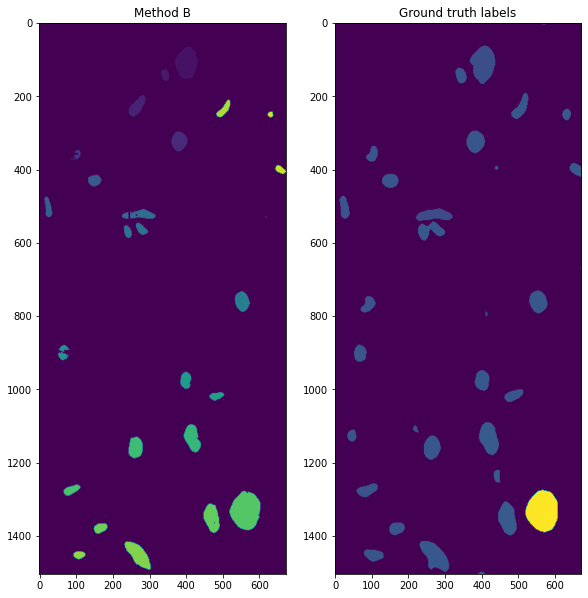

In [4]:
import os
import sys
import h5py
import numpy as np
from skimage.io import imread

# Show a few examples to heck that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

def load_img(path):
    h5f = h5py.File(path, 'r')
    k = list(h5f.keys())
    return np.array(h5f[k[0]])

toy_sample = load_img("/content/TIMISE_example_files/methodB/methodB.h5") 
toy_mask = load_img("/content/TIMISE_example_files/GT/gt.h5") 

# Select random slice
slice = randint(0, toy_sample.shape[0], 1)

plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)    
plt.title("Method B")
plt.imshow(toy_sample[slice].squeeze())
plt.subplot(1, 3, 2)    
plt.title("Ground truth labels")
plt.imshow(toy_mask[slice].squeeze())
plt.show()

## **2. Running TIMISE**


In [5]:
%cd /content/TIMISE
from timise import TIMISE

# Create three instance categories, small/medium/large, based on the cable length property. 
# The thresholds used to create those categories are 500 and 1000, which means:
#   - instances with cable length < 500 will be labelled as 'small'
#   - instances with 500 <= cable length < 1000 will be labelled as 'medium'
#   - instances with 1000 < cable length will be labelled as 'large' 
timise = TIMISE(split_categories=['small', 'medium', 'large'], split_property='cable_length', split_ths=[500, 1000]);

/content/TIMISE


In [6]:
timise.evaluate("/content/TIMISE_example_files/methodB", "/content/TIMISE_example_files/GT", "/content/out_dir")

*** Preliminary checks . . . 
No subfolders found, only considering files in /content/TIMISE_example_files/methodB
*** [DONE] Preliminary checks . . .
Calculating GT statistics . . .
Reading file /content/TIMISE_example_files/GT/gt.h5 . . .
Calculating volumes . . .
Skeletonizing . . .


Skeletonizing Labels:  96%|█████████▋| 105/109 [00:01<00:00, 67.49it/s]


Calculating cable length . . .
Adding categories information . . .
Creating grouping aux file for mAP calculation . . .
*** Evaluating . . .
Processing folder /content/TIMISE_example_files/methodB
Calculating predictions statistics . . .
Reading file /content/TIMISE_example_files/methodB/methodB.h5 . . .
Calculating volumes . . .
Skeletonizing . . .


Skeletonizing Labels:  94%|█████████▎| 146/156 [00:01<00:00, 92.17it/s]


Calculating cable length . . .
Adding categories information . . .
Calculating associations . . .
Associations between images /content/TIMISE_example_files/methodB/methodB.h5 and /content/TIMISE_example_files/GT/gt.h5
Image loading . . .
Calculation of matching between instances . . .
Calculating rest of missing instances not present in associations . . .
Total gt labels: 104 (processed 104)
Creating grouping aux file for mAP calculation . . .
Run mAP code . . .
	1. Load data
		 Assign prediction score
	2. Compute IoU
	 compute bounding boxes
		 chunk 0
		 chunk 1
		 chunk 2
		 chunk 3
		 chunk 4
	 compute iou matching


156it [00:00, 409.50it/s]


	-RUNTIME:	7.14 [sec]

start evaluation
Accumulating evaluation results...
DONE (t=0.01s).
Parsing /content/out_dir/methodB/map_match_p.txt file to build a dataframe . . .
Dataframe stored in /content/out_dir/methodB/map.csv . . .
Calculating matching metrics . . .
Using matching previously calculated with mAP . . .
*** [DONE] Evaluating . . .


We can print a summary of the metrics:

In [7]:
timise.summary()

Stats in /content/out_dir/methodB

              Average Precision (AP)              
+---------------+----------+----------+----------+
| IoU=0.50:0.95 | IoU=0.50 | IoU=0.75 | IoU=0.90 |
+---------------+----------+----------+----------+
|     0.087     |  0.369   |  0.035   |   0.0    |
+---------------+----------+----------+----------+

                                                Associations                                               
+----------+-------+------------+---------+-------------------+--------------------+--------------+-------+
| category |       | one-to-one | missing | over-segmentation | under-segmentation | many-to-many | Total |
+----------+-------+------------+---------+-------------------+--------------------+--------------+-------+
|  small   | Count |     37     |    7    |         5         |         1          |      0       |   50  |
|          |   %   |    74.0    |   14.0  |        10.0       |        2.0         |     0.0      |       |
|  medium 

We can also plot the errors for each category by simply calling plot() function:

In [8]:
timise.plot(plot_type='error_3d', font_size=12, plot_shape=[1200,600])

You can also generate a 2D plot:

In [9]:
timise.plot(plot_shape=[800,500], log_x=True)

You can also create a script to visualize all the instances of the prediction or just the ones that match a given category. For instance:

In [10]:
# Create methodB visualization script for large instances
timise.create_neuroglancer_file("methodB", categories=['large'])

# Create GT visualization script for large instances
timise.create_neuroglancer_file("gt", categories=['large'])

Neuroglancer script created in /content/out_dir/neuroglancer_methodB_large.py
Neuroglancer script created in /content/out_dir/neuroglancer_gt_large.py


This will create two different neuroglancer scripts. When you run them (follow the steps described [here](https://github.com/danifranco/TIMISE/tree/main/examples/neuroglancer) to do so) the result should be this:

**Left: GT ; Right: methodB**

# 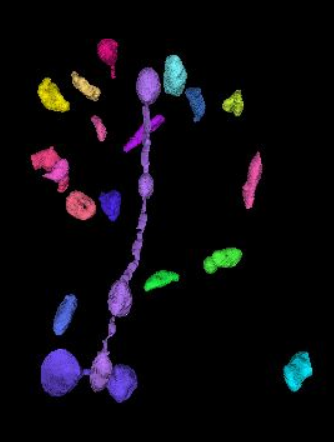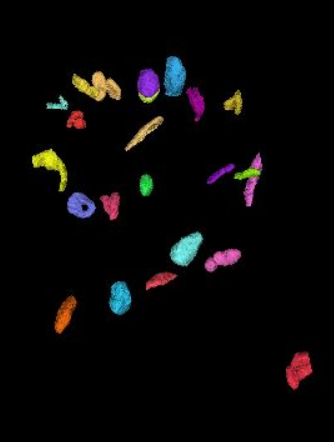